# Bibliotèques nécessaires

In [4]:
# Importer les bibliotèques nécessaires
import pandas as pd
from google.colab import files

# Chargement des fichiers

In [5]:
# Définition du dictionnaire des types
dtype_d_sku = {
    'sku_idr_sku': 'Int64',
    'mdl_num_model_r3': 'Int64',
    'mdl_blue_product': 'boolean',
    'fam_num_family': 'Int64',
    'family_label': 'string',
    'sdp_num_sub_department': 'Int64',
    'sdp_label': 'string',
    'dpt_num_department': 'Int64',
    'dpt_label': 'string',
    'unv_num_univers': 'Int64',
    'unv_label': 'string',
    'pnt_num_product_nature': 'Int64',
    'product_nature_label': 'string',
    'Category_label': 'string',
    'brd_type_brand_libelle': 'string'
}

dtype_d_customers = {
    'loyalty_card_num': 'Int64',
    'year_birthdate': 'Int64',
    'gender_id': 'Int64',
    'language_id': 'string',
    'email_is_valid': 'boolean',
    'mobile_is_valid': 'boolean',
    'but_idr_business_unit_usual': 'Int64',
    'but_idr_business_unit_creator': 'Int64',
    'cnt_country_code_creator': 'string',
    'optin_sport': 'boolean',
    'optin_review': 'boolean',
    'optin_event': 'boolean'
}

dtype_d_business_unit = {
    'but_idr_business_unit': 'Int64',
    'but_num_typ_but': 'Int64',
    'cnt_idr_country': 'Int64',
    'cnt_country_code': 'string',
    'but_name_business_unit': 'string',
    'but_postcode': 'string'  # Changement ici
}

dtype_f_transaction_detail = {
    'the_transaction_id': 'string',
    'sku_idr_sku': 'Int64',
    'but_idr_business_unit': 'Int64',
    'ctm_customer_id': 'Int64',
    'ctm_zip_code': 'string', # Changement ici
    'the_to_type': 'string',
    'the_transaction_status': 'string',
    'tdt_type_detail': 'string',
    'f_to_tax_in': 'float64',
    'f_qty_item': 'Int64'
}

dtype_flow_audience = {
    'url_referer_host': 'string',
    'product_id_model': 'Int64',
    'product_instock': 'string',
    'device_type': 'string',
    'avg_note': 'float64',
    'nb_reviews': 'Int64',
    'tot_visitors': 'Int64'
}

In [6]:
# Lecture des fichiers CSV

d_sku = pd.read_csv('d_sku.csv', dtype=dtype_d_sku, parse_dates=['sku_date_end'])

d_customers = pd.read_csv(
    'd_customers.csv',
    dtype=dtype_d_customers,
    parse_dates=['loyalty_card_creation_date', 'last_purchase_date']
)

d_business_unit = pd.read_csv('d_business_unit.csv', dtype=dtype_d_business_unit)

flow_audience = pd.read_csv(
    'flow_audience.csv',
    dtype=dtype_flow_audience,
    parse_dates=['hit_date']
)

f_transaction_detail = pd.read_csv(
    'f_transaction_detail.csv',
    dtype=dtype_f_transaction_detail,
    parse_dates=['tdt_date_to_returned', 'the_date_transaction', 'the_date_authorized']
)

# Data Quality

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframes = {
    'd_sku': d_sku,
    'd_customers': d_customers,
    'd_business_unit': d_business_unit,
    'flow_audience': flow_audience,
    'f_transaction_detail': f_transaction_detail
}

Missing Values in d_sku:
product_nature_label      2
category_label          469
dtype: int64


Missing Values in d_customers:
year_birthdate                 90364
gender_id                       6541
email_is_valid                  3949
mobile_is_valid               112552
loyalty_card_creation_date      1727
last_purchase_date               596
dtype: int64


Missing Values in d_business_unit:
but_postcode    5
dtype: int64


Missing Values in flow_audience:
avg_note      42
nb_reviews    42
dtype: int64


Missing Values in f_transaction_detail:
tdt_date_to_returned    2175530
the_date_authorized       15980
ctm_customer_id         1324324
ctm_zip_code            1480773
dtype: int64




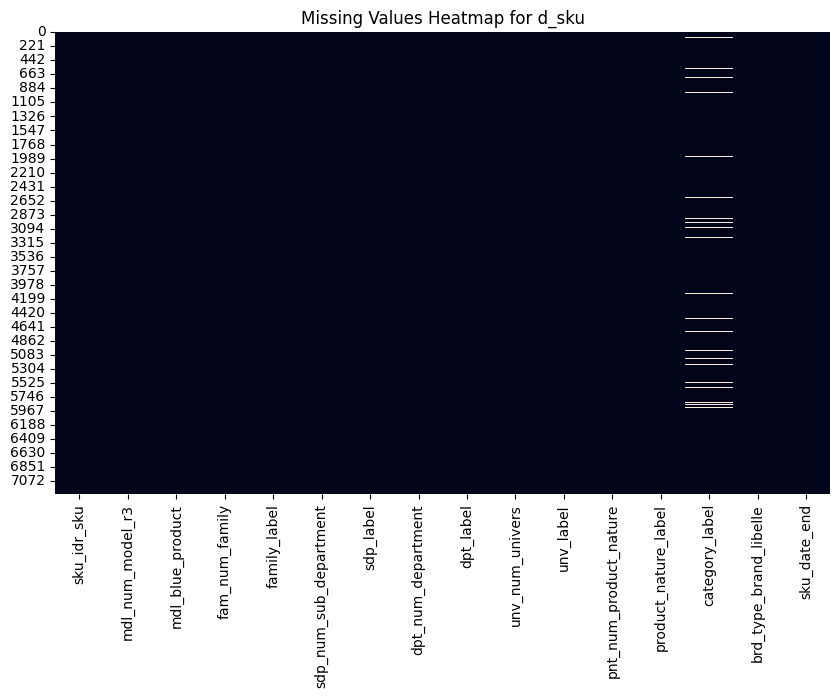

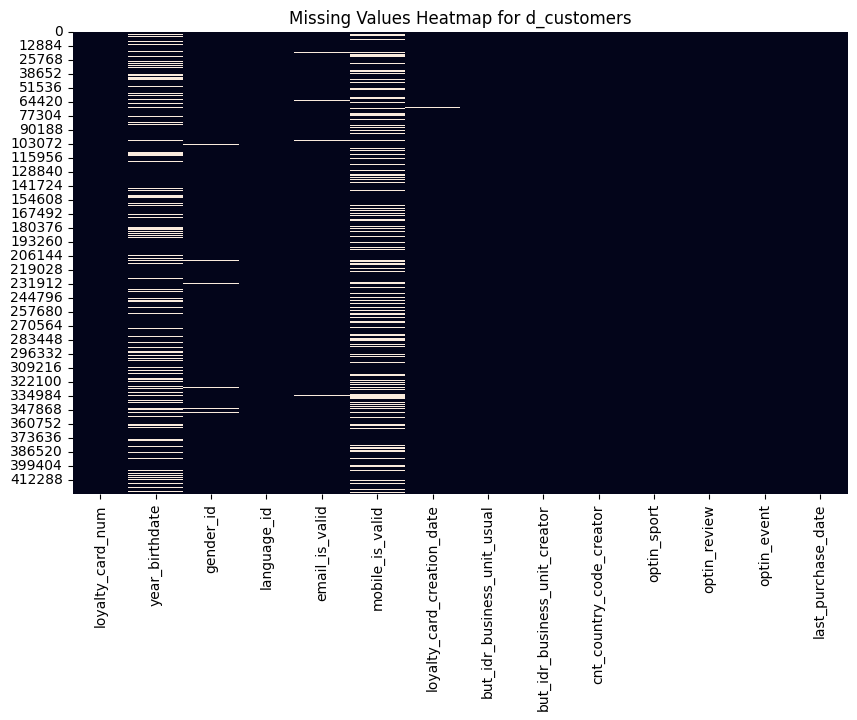

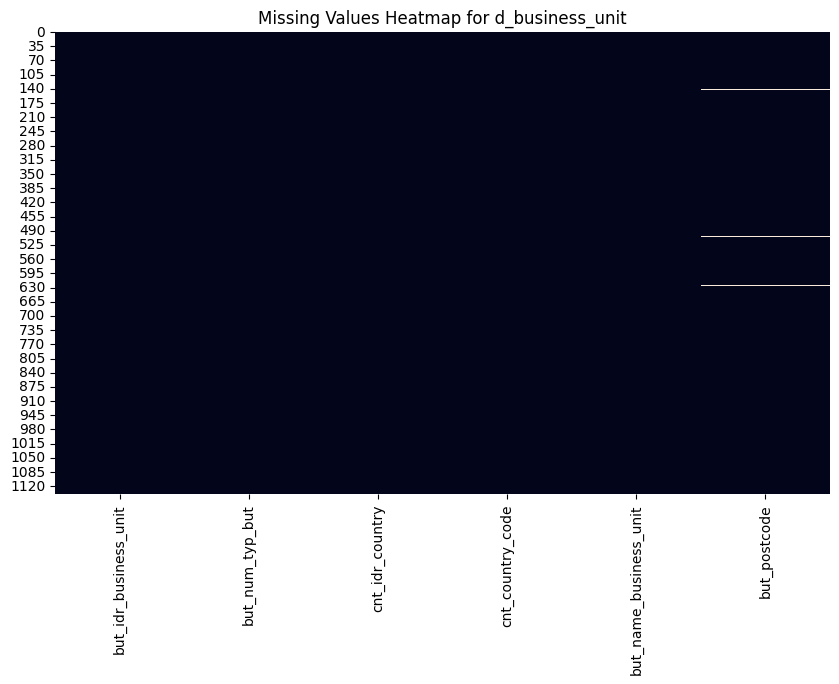

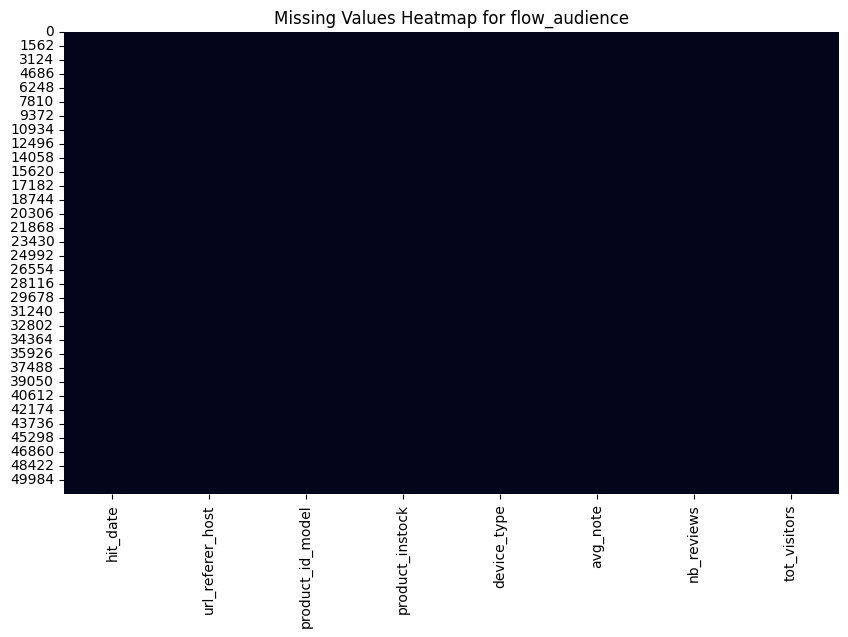

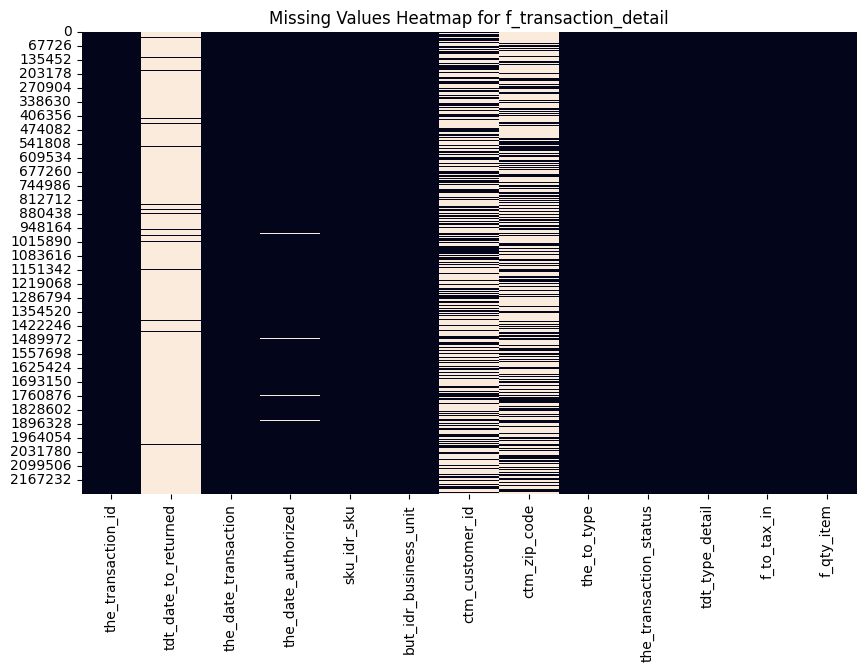

In [8]:
for name, df in dataframes.items():
    print(f"Missing Values in {name}:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\n")

for name, df in dataframes.items():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False)
    plt.title(f"Missing Values Heatmap for {name}")
    plt.show()

In [9]:
for name, df in dataframes.items():
    duplicates = df.duplicated().sum()
    print(f"Duplicate Rows in {name}: {duplicates}")

Duplicate Rows in d_sku: 0
Duplicate Rows in d_customers: 0
Duplicate Rows in d_business_unit: 0
Duplicate Rows in flow_audience: 0
Duplicate Rows in f_transaction_detail: 0


In [10]:
for name, df in dataframes.items():
    print(f"Statistical Summary for {name}:")
    print(df.describe(include='all'))
    print("\n")

Statistical Summary for d_sku:
           sku_idr_sku  mdl_num_model_r3 mdl_blue_product  fam_num_family  \
count           7279.0            7279.0             7279          7279.0   
unique            <NA>              <NA>                2            <NA>   
top               <NA>              <NA>            False            <NA>   
freq              <NA>              <NA>             7254            <NA>   
mean    6495952.646517    4892566.953428              NaN    13309.250172   
std     2020984.083966    2892389.367175              NaN     8192.482829   
min              334.0            7269.0              NaN           214.0   
25%          7196243.5         2361913.0              NaN         10785.0   
50%          7266920.0         4796535.0              NaN         10790.0   
75%          7349853.5         7451028.5              NaN         11956.0   
max          7506606.0         9998861.0              NaN         34866.0   

          family_label  sdp_num_sub_departme

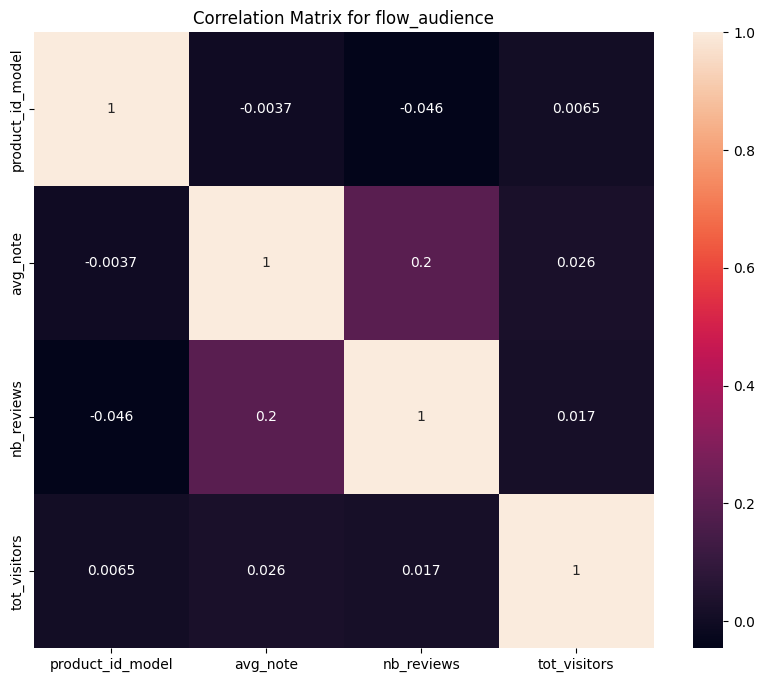

In [11]:
numeric_cols = flow_audience.select_dtypes(include=[np.number]).columns
correlation_matrix = flow_audience[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for flow_audience')
plt.show()

# Consolidation

In [12]:
# Gauche pour garder les enregistrements même s'il n'y a pas de correspondance
flow_audience_enriched = pd.merge(
    flow_audience,
    d_sku,
    left_on='product_id_model',
    right_on='mdl_num_model_r3',
    how='left'
)

# Inner pour ne garder que les transactions avec produits connus
transactions_enriched = pd.merge(
    f_transaction_detail,
    d_sku,
    on='sku_idr_sku',
    how='inner'
)

# Renommer les colonnes de d_business_unit avec un suffixe, sauf la clé de jointure
d_business_unit_usual_store = d_business_unit.rename(
    columns=lambda x: x + '_usual_store'
)

# Jointure entre d_customers et d_business_unit (magasin préféré)
customers_enriched = pd.merge(
    d_customers,
    d_business_unit_usual_store,
    left_on='but_idr_business_unit_usual',
    right_on='but_idr_business_unit_usual_store',
    how='left'
)

# transactions_enriched avec customers_enriched, on garde la transaction même si client pas connu
transactions_customers = pd.merge(
    transactions_enriched,
    customers_enriched,
    left_on='ctm_customer_id',
    right_on='loyalty_card_num',
    how='left'
)

# Renommer les colonnes de d_business_unit avec un suffixe, sauf la clé de jointure
d_business_unit_purchase_store = d_business_unit.rename(
    columns=lambda x: x + '_purchase_store'
)

# transactions_customers avec d_business_unit (magasin de l'achat)
transactions_full = pd.merge(
    transactions_customers,
    d_business_unit_purchase_store,
    left_on='but_idr_business_unit',
    right_on='but_idr_business_unit_purchase_store',
    how='left',
)

In [13]:
flow_audience_enriched.head()

hit_date  url_referer_host  product_id_model product_instock device_type  \
0 2020-08-27  www.decathlon.fr           2859688       available      mobile   
1 2020-08-27  www.decathlon.fr           2859688       available      mobile   
2 2020-08-27  www.decathlon.fr           2859688       available      mobile   
3 2020-08-27  www.decathlon.fr           2859688       available      mobile   
4 2020-08-27  www.decathlon.fr           2859688       available      mobile   

   avg_note  nb_reviews  tot_visitors  sku_idr_sku  mdl_num_model_r3  ...  \
0      4.46         112            21      7370347           2859688  ...   
1      4.46         112            21      7379561           2859688  ...   
2      4.46         112            21      7384330           2859688  ...   
3      4.46         112            21      7379328           2859688  ...   
4      4.46         112            21      7386260           2859688  ...   

   sdp_label  dpt_num_department dpt_label  unv_num_univers unv_label  \
0       YOGA                 440      YOGA               68      YOGA   
1       YOGA                 440      YOGA               68      YOGA   
2       YOGA                 440      YOGA               68      YOGA   
3       YOGA                 440      YOGA               68      YOGA   
4       YOGA                 440      YOGA               68      YOGA   

   pnt_num_product_nature product_nature_label  category_label  \
0                   25076           SPORTS BRA        CLOTHING   
1                   25076           SPORTS BRA        CLOTHING   
2                   25076           SPORTS BRA        CLOTHING   
3                   25076           SPORTS BRA        CLOTHING   
4                   25076           SPORTS BRA        CLOTHING   

  brd_type_brand_libelle         sku_date_end  
0                     MP  2999-12-31 23:59:59  
1                     MP  2999-12-31 23:59:59  
2                     MP  2999-12-31 23:59:59  
3                     MP  2999-12-31 23:59:59  
4                     MP  2999-12-31 23:59:59  

[5 rows x 24 columns]

In [14]:
transactions_full.head()

the_transaction_id tdt_date_to_returned the_date_transaction  \
0  7-214-214-20200827180547-5-3116                  NaT  2020-08-27 18:05:47   
1    7-62-62-20200827180621-9-5947                  NaT  2020-08-27 18:06:21   
2  7-553-553-20200827180631-7-3156                  NaT  2020-08-27 18:06:31   
3  7-276-276-20200827180648-7-6711                  NaT  2020-08-27 18:06:48   
4  7-189-189-20200827180710-36-276                  NaT  2020-08-27 18:07:10   

  the_date_authorized  sku_idr_sku  but_idr_business_unit  ctm_customer_id  \
0 2020-08-27 18:05:47      7218584                  33780             <NA>   
1 2020-08-27 18:06:21      7218097                  33640             <NA>   
2 2020-08-27 18:06:31      7394559                  34110             <NA>   
3 2020-08-27 18:06:48      2137874                  33839  436746541249259   
4 2020-08-27 18:07:10       516174                  33758             <NA>   

  ctm_zip_code the_to_type the_transaction_status  ...  \
0           38     offline               finished  ...   
1         <NA>     offline               finished  ...   
2         <NA>     offline               finished  ...   
3         <NA>     offline               finished  ...   
4           75     offline               finished  ...   

  cnt_idr_country_usual_store  cnt_country_code_usual_store  \
0                        <NA>                          <NA>   
1                        <NA>                          <NA>   
2                        <NA>                          <NA>   
3                          66                            FR   
4                        <NA>                          <NA>   

   but_name_business_unit_usual_store  but_postcode_usual_store  \
0                                <NA>                      <NA>   
1                                <NA>                      <NA>   
2                                <NA>                      <NA>   
3                             LORIENT                     56100   
4                                <NA>                      <NA>   

   but_idr_business_unit_purchase_store  but_num_typ_but_purchase_store  \
0                                 33780                               7   
1                                 33640                               7   
2                                 34110                               7   
3                                 33839                               7   
4                                 33758                               7   

  cnt_idr_country_purchase_store  cnt_country_code_purchase_store  \
0                             66                               FR   
1                             66                               FR   
2                             66                               FR   
3                             66                               FR   
4                             66                               FR   

  but_name_business_unit_purchase_store  but_postcode_purchase_store  
0                      BOURGOIN-JALLIEU                        38300  
1                      CLERMONT FERRAND                        63000  
2                       LES PONTS DE CE                        49130  
3                            SARREBOURG                        57400  
4                    PARIS LA MADELEINE                        75000  

[5 rows x 54 columns]

# Analyse Assortiments

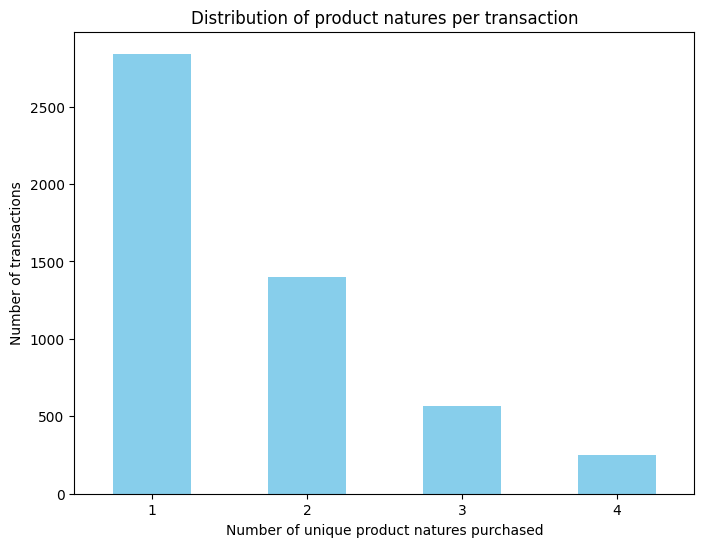

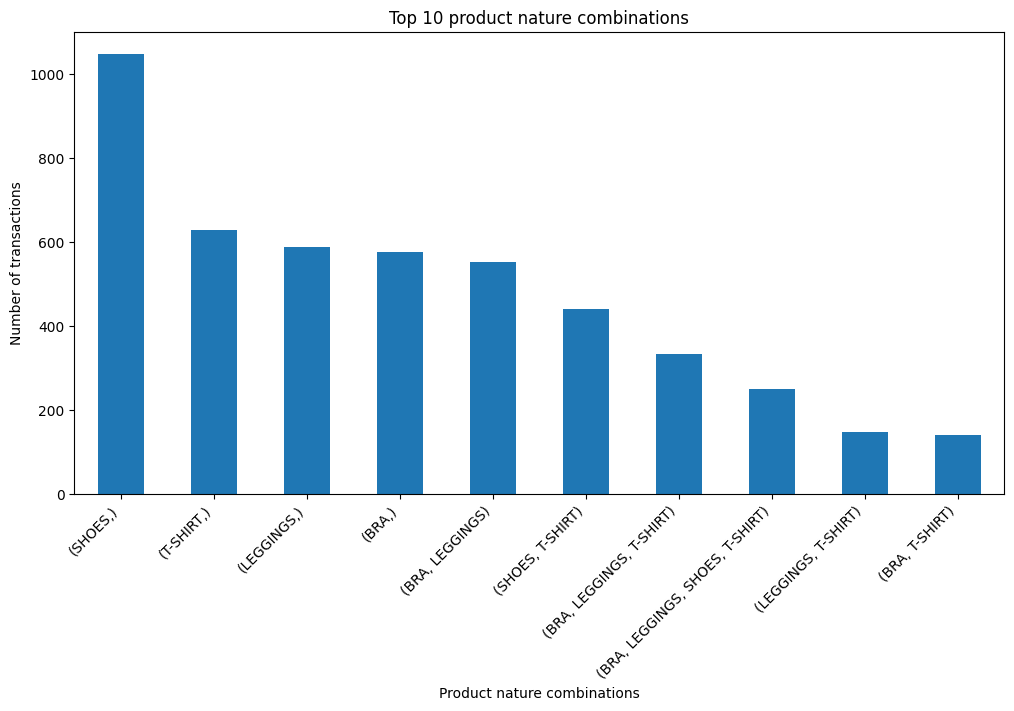

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter transactions to include only specified product IDs
product_ids = [7635140, 5015822, 2486222, 7166996]
df_filtered = transactions_full[transactions_full['mdl_num_model_r3'].isin(product_ids)]


# Step 2: Analyze product natures using 'product_nature_label'
# If 'product_nature_label' is not present, ensure it's included in the DataFrame
transactions = df_filtered.groupby('the_transaction_id')['product_nature_label'].apply(set).reset_index()

# Count the number of unique product natures per transaction
transactions['num_product_natures'] = transactions['product_nature_label'].apply(len)

# Create a sorted tuple of product natures for each transaction to represent combinations
transactions['combination'] = transactions['product_nature_label'].apply(lambda x: tuple(sorted(x)))

# Step 3: Count the frequency of each unique combination
combination_counts = transactions['combination'].value_counts()

# Step 4: Visualize the distribution of product natures per transaction
num_product_natures_counts = transactions['num_product_natures'].value_counts().sort_index()

# Check if there are any counts to plot
plt.figure(figsize=(8, 6))
num_product_natures_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of unique product natures purchased')
plt.ylabel('Number of transactions')
plt.title('Distribution of product natures per transaction')
plt.xticks(rotation=0)
plt.show()

print("")

# Visualize the most popular combinations
top_combinations = combination_counts.head(10)
plt.figure(figsize=(12, 6))
top_combinations.plot(kind='bar')
plt.xlabel('Product nature combinations')
plt.ylabel('Number of transactions')
plt.title('Top 10 product nature combinations')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sorties CSV

In [13]:
# Save transactions_full to CSV
transactions_full.to_csv('transactions_full.csv', index=False)

# Save flow_audience_enriched to CSV
flow_audience_enriched.to_csv('flow_audience_enriched.csv', index=False)

# Download transactions_full.csv
files.download('transactions_full.csv')

# Download flow_audience_enriched.csv
files.download('flow_audience_enriched.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>